Create variables for the paths to the datasets

In [6]:
import os

base_dir = 'dataset'
training_dir = os.path.join(base_dir, 'Train_Alphabet')
test_dir = os.path.join(base_dir, 'Test_Alphabet')

print(os.listdir(training_dir))
print(len(os.listdir(training_dir)))

['Y', 'S', 'V', 'U', 'Q', 'W', 'T', 'Blank', 'R', 'H', 'I', 'N', 'F', 'P', 'M', 'X', 'A', 'D', 'E', 'J', 'K', 'Z', 'B', 'G', 'O', 'C', 'L']
27


Preview a random subset of images

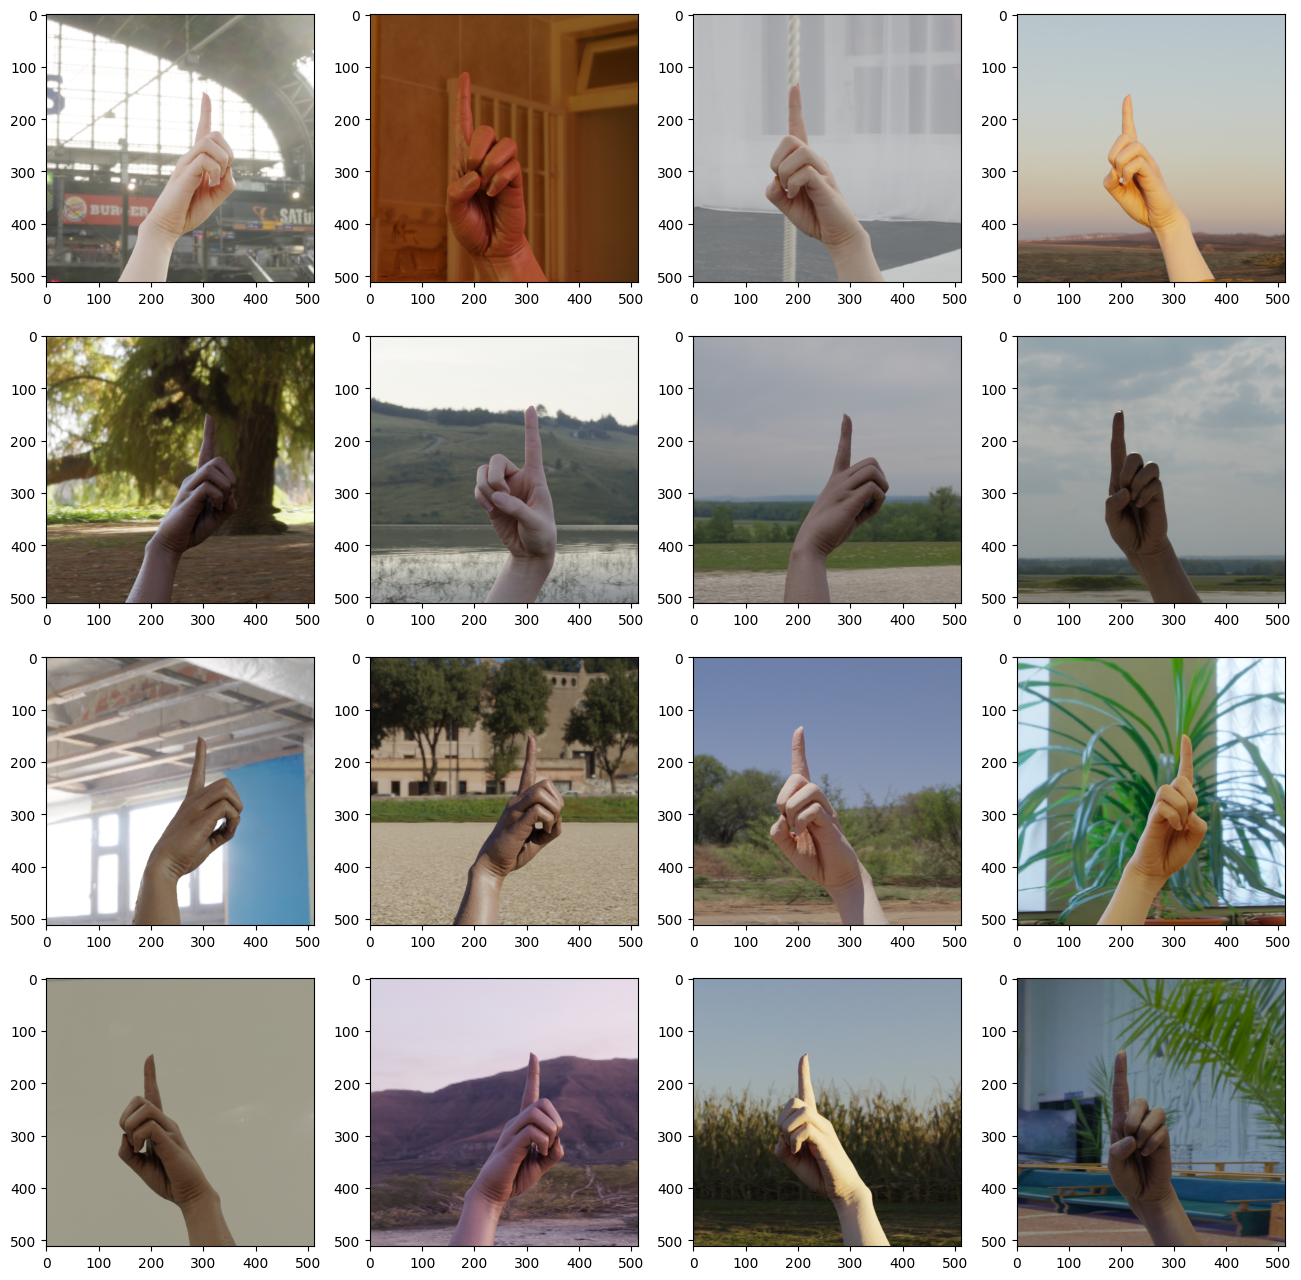

In [7]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#Change this letter to view different pictures of letters
letter = 'D'
letter_dir = os.path.join(training_dir, letter)
letter_file_names = os.listdir(letter_dir)


nrows = 4
ncols = 4
num_pics = int((nrows * ncols))

pic_index = 20

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += num_pics

photos = [os.path.join(letter_dir, file_name) for file_name in letter_file_names[pic_index - num_pics:pic_index]]

for i, img_path in enumerate(photos):
    #Create Subplot, indexed at 1
    subplot = plt.subplot(nrows, ncols, i+1)
    #subplot.axis('Off')
    image = mpimg.imread(img_path)
    plt.imshow(image)
    
plt.show()



Creating the model
-> Assuming images are in uniform size of 200 x 200 pixels
-> Softmax activation used in multiclass identification

In [8]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import scipy
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [9]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        #tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(27, activation='softmax')
    ])
    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

Will create training generators:

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0 / 255.)
test_datagen = ImageDataGenerator(rescale = 1.0 / 255. )

#Create the generator that creates batches of 20
batchSize = 20
train_generator = train_datagen.flow_from_directory(training_dir,
                                                   batch_size=batchSize,
                                                   class_mode='categorical',
                                                   target_size=(200,200))
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 batch_size=batchSize,
                                                 class_mode='categorical',
                                                 target_size=(200,200))



Found 24300 images belonging to 27 classes.
Found 2700 images belonging to 27 classes.


Create training process


In [11]:
EPOCHS = 20
model = create_model()
history = model.fit(
    train_generator,
    steps_per_epoch=100, #2000 images = batch_size * steps
    epochs=EPOCHS,
    validation_data=test_generator,
    validation_steps=50, #1000 images = batch_size * steps
    verbose=1
)

2022-10-17 23:06:47.381689: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-17 23:06:48.294648: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9007 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:41:00.0, compute capability: 7.5


Epoch 1/20


2022-10-17 23:06:50.372362: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-10-17 23:06:51.316341: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-10-17 23:06:51.317537: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-10-17 23:06:51.317557: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-10-17 23:06:51.318717: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-10-17 23:06:51.318760: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


100/100 [==============================] - 28s 242ms/step - loss: 3.2743 - accuracy: 0.0610 - val_loss: 3.2104 - val_accuracy: 0.0720
Epoch 2/20
100/100 [==============================] - 24s 236ms/step - loss: 2.9104 - accuracy: 0.1950 - val_loss: 2.4374 - val_accuracy: 0.3240
Epoch 3/20
100/100 [==============================] - 23s 234ms/step - loss: 2.1340 - accuracy: 0.3770 - val_loss: 1.8434 - val_accuracy: 0.4910
Epoch 4/20
100/100 [==============================] - 23s 232ms/step - loss: 1.5400 - accuracy: 0.5455 - val_loss: 1.3931 - val_accuracy: 0.6110
Epoch 5/20
100/100 [==============================] - 23s 232ms/step - loss: 1.2608 - accuracy: 0.6425 - val_loss: 1.0696 - val_accuracy: 0.6800
Epoch 6/20
100/100 [==============================] - 23s 231ms/step - loss: 1.0343 - accuracy: 0.7080 - val_loss: 0.9836 - val_accuracy: 0.6940
Epoch 7/20
100/100 [==============================] - 23s 226ms/step - loss: 0.7547 - accuracy: 0.7825 - val_loss: 0.7500 - val_accuracy: 0.8

Visualizing Intermediate Representations

In [27]:
import numpy as np
import random
import math
from tensorflow.keras.preprocessing.image import img_to_array, load_img

model.summary()

#Define a new model that takes image an input, and will output
#intermediate representations for all layers in the previous model

successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs=successive_outputs)

#Change this letter to view different pictures of letters
letter = 'D'
letter_dir = os.path.join(training_dir, letter)
letter_file_names = os.listdir(letter_dir)
photos = [os.path.join(letter_dir, filename) for filename in letter_file_names]


img_path = random.choice(photos)
img = load_img(img_path, target_size=(200, 200)) #PIL image
x = img_to_array(img) #Numpy array with shape (200, 200 3)
x = x.reshape((1,) + x.shape) #Reshape with (1, 150, 150, 3)
x /= 255.0

#Run image through the network
successive_feature_maps = visualization_model.predict(x)

#Names of layers in the model
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1] #Number of features in the feature map
        size = feature_map.shape[1] #feature map shape (1, size, size, n_features), hence the 4
        display_grid = np.zeros((size, size * n_features))
        
        #Process images to be easy to see
        for i in range(n_features):
            channel_image = feature_map[0, :, : i]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[:, i*size : (i+1) * size] = channel_image
        
        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

/tmp/ipykernel_10951/1015528809.py:41: RuntimeWarning: Mean of empty slice.
  channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable


ValueError: could not broadcast input array from shape (198,0,32) into shape (198,198)

1/1 [==============================] - 0s 70ms/step


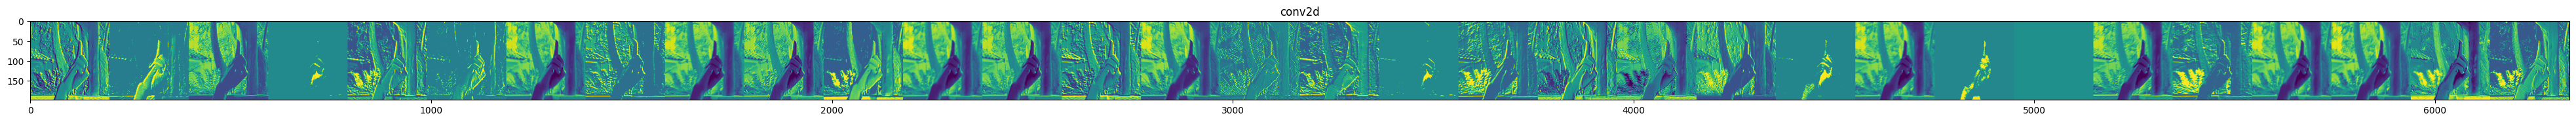

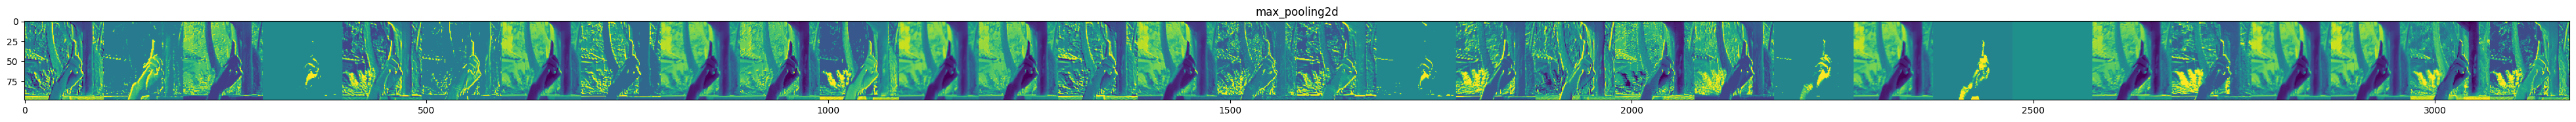

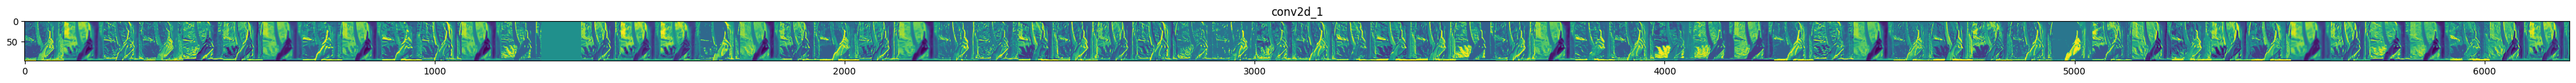

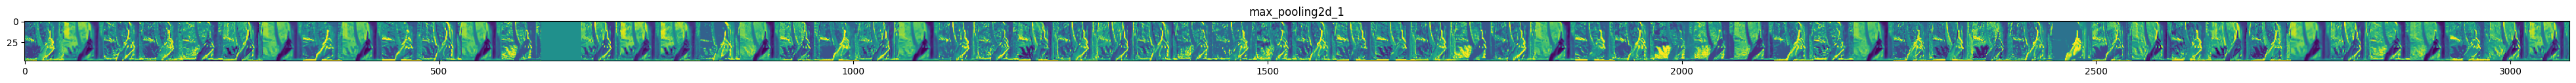

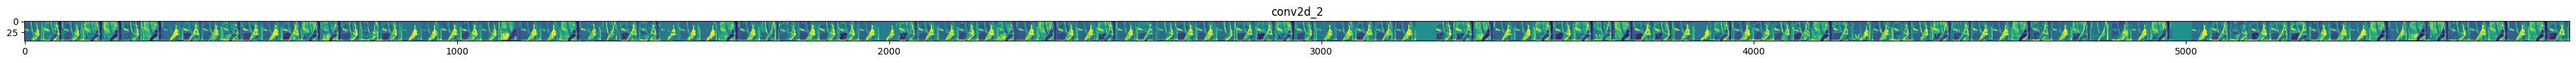

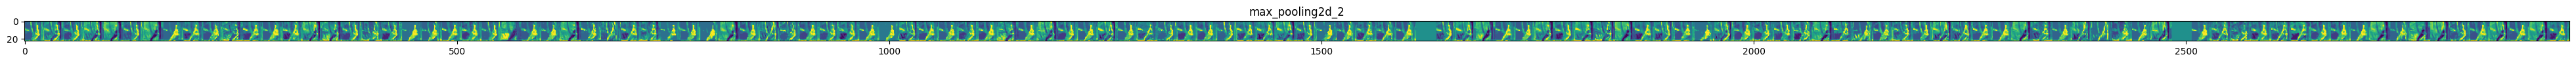

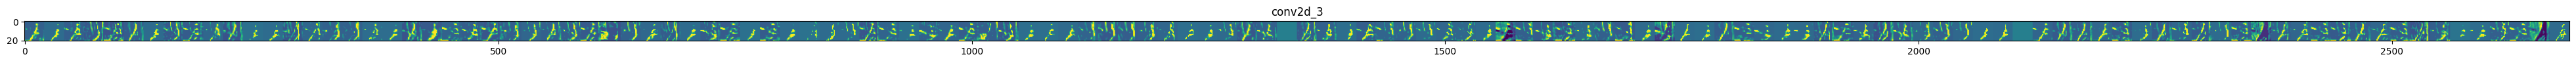

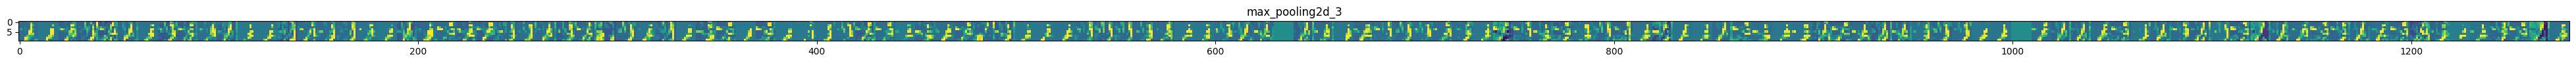

In [35]:
import numpy as np
import random
import math
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import img_to_array, load_img

#Change this letter to view different pictures of letters
letter = 'D'
letter_dir = os.path.join(training_dir, letter)
letter_file_names = os.listdir(letter_dir)
photos = [os.path.join(letter_dir, filename) for filename in letter_file_names]

img_path = random.choice(photos)
img = load_img(img_path, target_size=(200, 200)) #PIL image
x = img_to_array(img) #Numpy array with shape (200, 200 3)
x = x.reshape((1,) + x.shape) #Reshape with (1, 150, 150, 3)
x /= 255.0

layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) #Takes model input, returns output of all layers

activations = activation_model.predict(x)

#images_per_row = 16
layer_names = [layer.name for layer in model.layers]
for layer_name, layer_activation in zip(layer_names, activations):
    if len(layer_activation.shape) != 4:
        continue
    
    n_features = layer_activation.shape[-1] #Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features)
    #n_cols = n_features // images_per_row 
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
        channel_image = layer_activation[0, :, :, i]
        channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
        if (channel_image.std() != 0):
            channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[:, (i * size) : ((i+1) * size)] = channel_image
    scale = 50. / n_features
    plt.figure( figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
